Recording...
Recording finished.


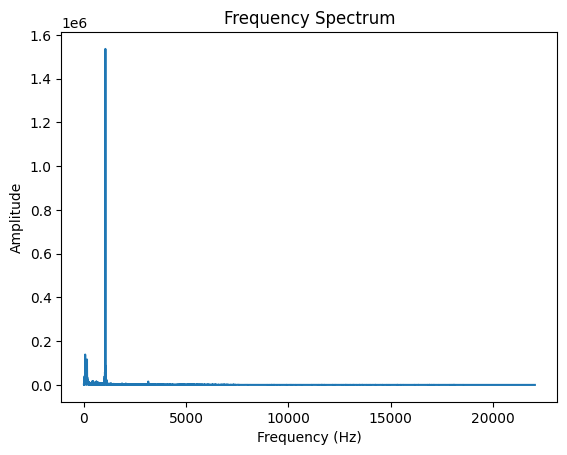

In [7]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the audio recording
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024

# Initialize PyAudio
p = pyaudio.PyAudio()

# Open a stream with the above parameters
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Recording...")

# Record data for a set duration
duration = 1  # seconds
frames = []

for _ in range(0, int(RATE / CHUNK * duration)):
    data = stream.read(CHUNK)
    frames.append(np.frombuffer(data, dtype=np.int16))

print("Recording finished.")

# Stop and close the stream
stream.stop_stream()
stream.close()
p.terminate()

# Convert the list of frames into a NumPy array
audio_data = np.hstack(frames)

# Apply FFT
fft_result = np.fft.fft(audio_data)

# Get the corresponding frequencies
frequencies = np.fft.fftfreq(len(fft_result), 1.0 / RATE)

# Only take the positive part of the spectrum
positive_freqs = frequencies[:len(frequencies)//2]
positive_fft = np.abs(fft_result[:len(fft_result)//2])

# Plot the results
plt.plot(positive_freqs, positive_fft)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.show()


In [8]:
max_index = np.argmax(positive_fft)

loudest_freq = positive_freqs[max_index]

print("The loudest frequency is: ", loudest_freq, "Hz")

The loudest frequency is:  1047.6153706395348 Hz


In [15]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the audio recording
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
VOLUME_THRESHOLD = 100000

# Initialize PyAudio
p = pyaudio.PyAudio()

# Open a stream with the above parameters
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Recording...")

# Record data for a set duration
frames = []

while True:
    for _ in range(0, int(RATE / CHUNK)):
        data = stream.read(CHUNK)
        frames.append(np.frombuffer(data, dtype=np.int16))

    print("Recording finished.")

    audio_data = np.hstack(frames)
    volume = np.linalg.norm(audio_data)

    if volume > VOLUME_THRESHOLD:
        print("Sound detected.")
    else:
        print("No sound detected.")
        continue

    fft_result = np.fft.fft(audio_data)
    frequencies = np.fft.fftfreq(len(fft_result), 1.0 / RATE)

    # Only take the positive part of the spectrum
    positive_freqs = frequencies[:len(frequencies)//2]
    positive_fft = np.abs(fft_result[:len(fft_result)//2])

    positive_freqs_sorted = np.argsort(positive_fft)

    for i in range(1, 4):
        print("The ", i, "th loudest frequency is: ", positive_freqs[positive_freqs_sorted[-i]], "Hz")
    print("\n")
    frames=[]

Recording...
Recording finished.
No sound detected.
Recording finished.
No sound detected.
Recording finished.
Sound detected.
The  1 th loudest frequency is:  117.1806867732558 Hz
The  2 th loudest frequency is:  117.51453488372093 Hz
The  3 th loudest frequency is:  117.84838299418604 Hz


Recording finished.
Sound detected.
The  1 th loudest frequency is:  116.17914244186045 Hz
The  2 th loudest frequency is:  150.2316497093023 Hz
The  3 th loudest frequency is:  115.1775981104651 Hz


Recording finished.
No sound detected.
Recording finished.
No sound detected.
Recording finished.
Sound detected.
The  1 th loudest frequency is:  452.3641896802325 Hz
The  2 th loudest frequency is:  452.69803779069764 Hz
The  3 th loudest frequency is:  452.0303415697674 Hz


Recording finished.
Sound detected.
The  1 th loudest frequency is:  452.69803779069764 Hz
The  2 th loudest frequency is:  113.17450944767441 Hz
The  3 th loudest frequency is:  450.6949491279069 Hz


Recording finished.
Sound

KeyboardInterrupt: 

In [29]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
import whisper
import torch


# Parameters for the audio recording
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 1024
VOLUME_THRESHOLD = 100000

model = whisper.load_model("tiny")

# Initialize PyAudio
p = pyaudio.PyAudio()

# Open a stream with the above parameters
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Recording...")

# Record data for a set duration
frames = []

while True:
    for _ in range(0, int(RATE / CHUNK)):
        data = stream.read(CHUNK)
        frames.append(np.frombuffer(data, dtype=np.int16).astype(np.float32) / 32768)
    print("Recording finished.")

    audio_data = np.hstack(frames)
    volume = np.linalg.norm(audio_data)

    print("Volume: ", volume)

     # Ensure the length of audio data is compatible with Whisper
    whisper_audio_data = np.pad(audio_data, (0, max(0, CHUNK - len(audio_data))), 'constant')
    
    # Convert the audio data to a tensor
    audio_tensor = torch.from_numpy(whisper_audio_data).unsqueeze(0)
    
    transcribe = model.transcribe(audio_tensor)
    # if volume > VOLUME_THRESHOLD:
    #     print("Sound detected.")
    # else:
    #     print("No sound detected.")
    #     continue

    # fft_result = np.fft.fft(audio_data)
    # frequencies = np.fft.fftfreq(len(fft_result), 1.0 / RATE)

    # # Only take the positive part of the spectrum
    # positive_freqs = frequencies[:len(frequencies)//2]
    # positive_fft = np.abs(fft_result[:len(fft_result)//2])

    # positive_freqs_sorted = np.argsort(positive_fft)

    # for i in range(1, 4):
    #     print("The ", i, "th loudest frequency is: ", positive_freqs[positive_freqs_sorted[-i]], "Hz")
    # print("\n")
    frames=[]

Recording...
Recording finished.
Volume:  0.18303706


c:\Users\Kevin Yang\Make v2\Hackathons\Apocolypse\zombie-yute\.venv\lib\site-packages\whisper\transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


AttributeError: 'list' object has no attribute 'get'

In [21]:
def calibrate_noise_floor():
    noise_floor = 0
    DURATION = 10  # seconds
    for _ in range(0, int(RATE / CHUNK * DURATION)):
        data = stream.read(CHUNK)
        frames.append(np.frombuffer(data, dtype=np.int16))

    audio_data = np.hstack(frames)
    noise_floor = np.linalg.norm(audio_data)
    return noise_floor


calibrate_noise_floor()

594327.7694555421

Youtube video causes average of 163992.31173137354 

In [39]:
import pyaudio
import numpy as np
import whisper
import torch
import time

# Load the Whisper model
model = whisper.load_model("base")

# Parameters for the audio recording
FORMAT = pyaudio.paInt16  # Format of sampling (16-bit PCM)
CHANNELS = 1              # Number of channels (mono)
RATE = 16000              # Sampling rate (16 kHz for Whisper compatibility)
CHUNK = 1024              # Number of frames per buffer
CHUNKS_PER_SECOND = RATE // CHUNK
BUFFER_SIZE_SECONDS = 10
BUFFER_SIZE = CHUNKS_PER_SECOND * BUFFER_SIZE_SECONDS

# Initialize PyAudio
p = pyaudio.PyAudio()

# Open a stream with the above parameters
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK)

print("Listening...")

# Initialize a buffer to hold audio data
audio_buffer = np.zeros(BUFFER_SIZE * CHUNK, dtype=np.float32)

try:
    while True:
        # Read audio data from the stream
        for i in range(BUFFER_SIZE):
            data = stream.read(CHUNK)
            audio_chunk = np.frombuffer(data, dtype=np.int16).astype(np.float32) / 32768.0
            audio_buffer[i * CHUNK:(i + 1) * CHUNK] = audio_chunk

        # Convert the audio buffer to the format expected by Whisper
        audio_buffer = audio_buffer.astype(np.float32)

        # Transcribe the audio data
        result = model.transcribe(audio_buffer, fp16=False)

        # Print the transcribed text
        print(result['text'])

        # Sleep for a while to simulate real-time processing (optional)
        # time.sleep(BUFFER_SIZE_SECONDS)

except KeyboardInterrupt:
    print("Stopping...")

# Stop and close the stream
stream.stop_stream()
stream.close()
p.terminate()


Listening...
 Wash.
 Thank you.
 you
 Thank you.
